In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset
penguins = sns.load_dataset("penguins")

# Show basic info
penguins.info()
penguins.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
# Data Cleaning 
penguins_clean = penguins.dropna()

# Filter: 
penguins_clean = penguins_clean[penguins_clean['species'].isin(['Adelie', 'Gentoo', 'Chinstrap'])]

# Check cleaned data
penguins_clean.info()
penguins_clean.head()


<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [3]:
# GroupBy species 
species_summary = penguins_clean.groupby('species')[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].mean().reset_index()
species_summary


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,Adelie,38.823973,18.347260,190.102740,3706.164384
1,Chinstrap,48.833824,18.420588,195.823529,3733.088235
2,Gentoo,47.568067,14.996639,217.235294,5092.436975


/var/folders/1r/rtbkyl8558g8180q4wgw6wtr0000gn/T/ipykernel_55131/3847925162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=species_summary, x='species', y='body_mass_g', palette='viridis')


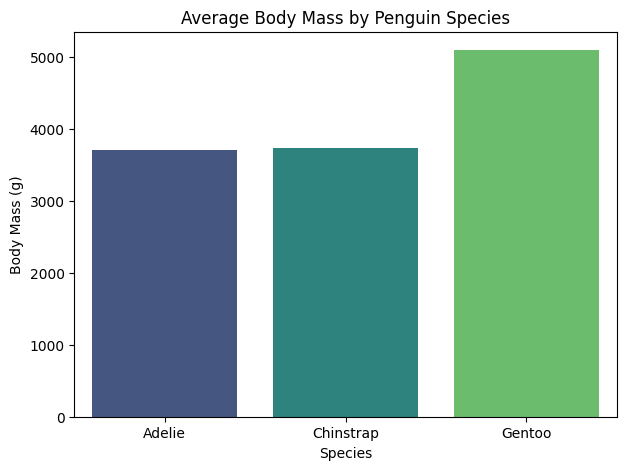

In [4]:
# Bar Plot 
plt.figure(figsize=(7,5))
sns.barplot(data=species_summary, x='species', y='body_mass_g', palette='viridis')
plt.title('Average Body Mass by Penguin Species')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.show()


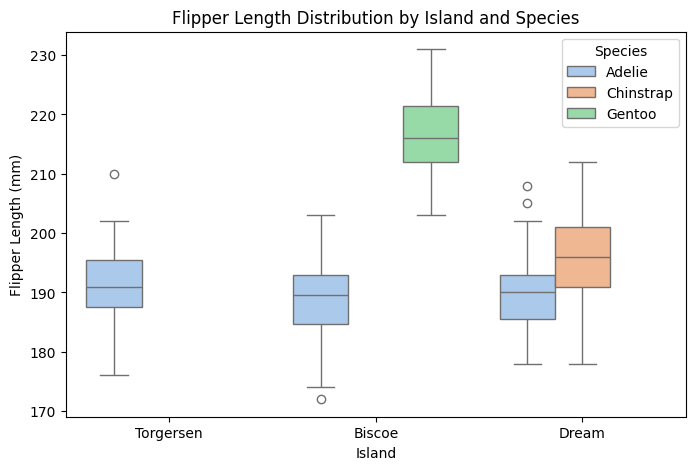

In [5]:
# Box Plot 
plt.figure(figsize=(8,5))
sns.boxplot(data=penguins_clean, x='island', y='flipper_length_mm', hue='species', palette='pastel')
plt.title('Flipper Length Distribution by Island and Species')
plt.xlabel('Island')
plt.ylabel('Flipper Length (mm)')
plt.legend(title='Species')
plt.show()


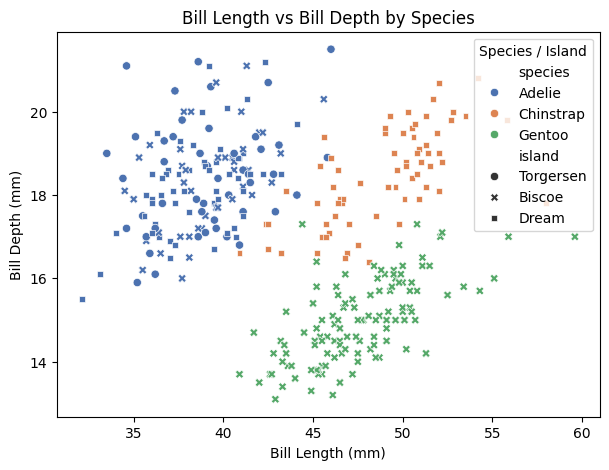

In [6]:
# Scatter Plot 
plt.figure(figsize=(7,5))
sns.scatterplot(data=penguins_clean, x='bill_length_mm', y='bill_depth_mm', hue='species', style='island', palette='deep')
plt.title('Bill Length vs Bill Depth by Species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend(title='Species / Island')
plt.show()
